In [150]:
import sympy as sp 
import cmath as cm 

x = sp.symbols('x')
c = sp.symbols('c')

#Expression for langrange's Theorem
exp = 2*x**2 + 6*x + 3  
lower_limit =1
upper_limit =4

## Verification of Lagrange's Mean Value Theorem

In [34]:
def is_continuos(expr, lower_limit, upper_limit):
    return (sp.limit(expr, x, lower_limit, '+') == expr.subs({x:lower_limit})) and (sp.limit(expr, x, upper_limit, '-') == expr.subs({x:upper_limit}))

In [80]:
def is_verified(expr, lower_limit, upper_limit):
    if is_continuos(expr, lower_limit, upper_limit):             
        f_dash_c = sp.diff(expr).subs({x:c})
        l_value = (expr.subs({x:upper_limit}) - expr.subs({x:lower_limit}))/(upper_limit-lower_limit)
        c_value= sp.solve(sp.Eq(f_dash_c, l_value), c)
        values = []
        for val in c_value:
            if val >=lower_limit and val<=upper_limit:
                values.append(val)
        if len(values)==0:
            return [False, expr, 'not differentiable']            
        else:
            return [True, expr, values]

        

    else:
        return [False, expr, 'not continuos']

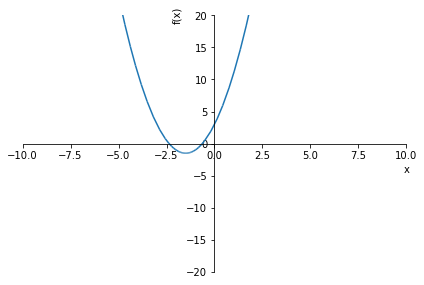

In [151]:
sp.plot(exp, xlim = [-10,10], ylim = [-20, 20])

In [152]:
is_verified(exp, lower_limit, upper_limit)

[True, 2*x**2 + 6*x + 3, [5/2]]

In [153]:
c_value = is_verified(exp, lower_limit, upper_limit)[2]
if type(c_value) == str:
    print('The expression not differential within the range')
else:
    c_value = c_value[0]
    
c_value

5/2

## Geometric Interpretation of Langrange's Theorem

In [154]:
def geo_interpretation(expr, a, b):
    f_a = expr.subs({x:a})
    f_b = expr.subs({x:b})
    slope_chord = (f_b - f_a)/(b-a)
    slope_tangent = sp.diff(expr).subs({x:c_value})
    y_intercept_chord = f_b- slope_chord*b
    y_intercept_tangent = expr.subs({x:c_value})-slope_tangent*c_value
    if slope_chord == slope_tangent:
        return [True, expr, slope_chord*x+y_intercept_chord, slope_tangent*x+y_intercept_tangent]
    else:
        return [False, expr, slope_chord*x+y_intercept_chord, slope_tangent*x+y_intercept_tangent]

In [162]:
results = geo_interpretation(exp, lower_limit, upper_limit)
results

[True, 2*x**2 + 6*x + 3, 16*x - 5, 16*x - 19/2]

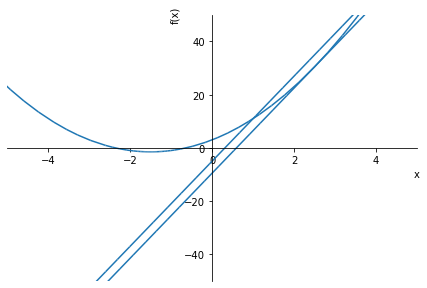

In [169]:
function = results[1]
chord = results[2]
tangent = results[3]

p1 = sp.plot(function, chord, xlim = [-5,5], ylim=[-50,50], show=False)
p2 = sp.plot(tangent, xlim = [-5,5], ylim=[-10,10], show=False)
p1.extend(p2)
p1.show()
